# Introduction to Data Visualization with Seaborn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
# Load csv files
world_countries = pd.read_csv("../data/countries-of-the-world.csv")
survey_data = pd.read_csv("../data/young-people-survey-responses.csv")
student_data = pd.read_csv("../data/student-alcohol-consumption.csv")
mpg = pd.read_csv("../data/mpg.csv")
age_cat = pd.read_csv('../data/age-cat.csv')

In [4]:
# Load the data in list
gdp = world_countries["GDP ($ per capita)"].values
phones = world_countries["Phones (per 1000)"].values
percent_literate = world_countries["Literacy (%)"].values
region = world_countries["Region"].values

### Making a scatter plot with lists
In this exercise, we'll use a dataset that contains information about 227 countries. This dataset has lots of interesting information on each country, such as the country's birth rates, death rates, and its gross domestic product (GDP). GDP is the value of all the goods and services produced in a year, expressed as dollars per person.

We've created three lists of data from this dataset to get you started. gdp is a list that contains the value of GDP per country, expressed as dollars per person. phones is a list of the number of mobile phones per 1,000 people in that country. Finally, percent_literate is a list that contains the percent of each country's population that can read and write.

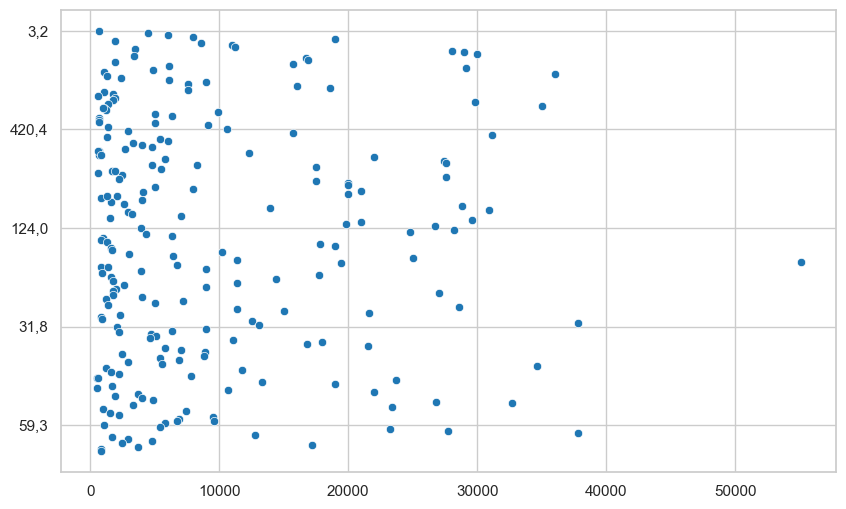

In [5]:
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp, y=phones)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
plt.show()

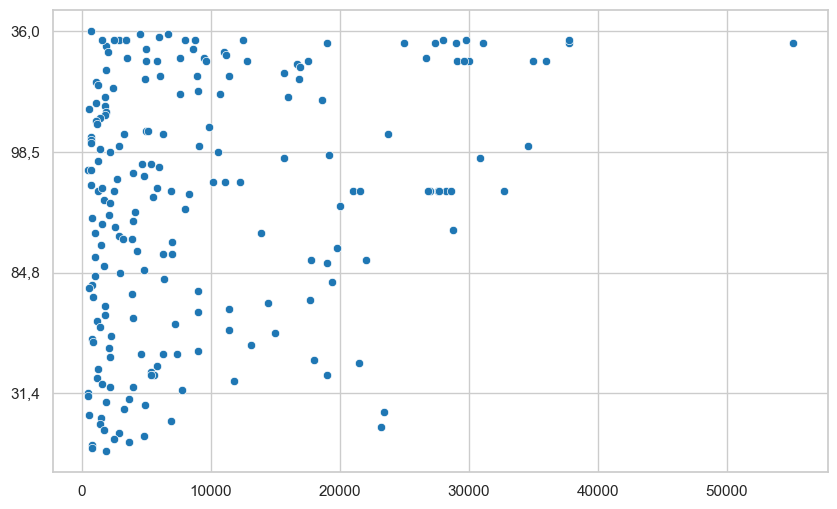

In [6]:
# Change this scatter plot to have percent literate on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp, y=percent_literate)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
plt.show()

> While this plot does not show a linear relationship between GDP and percent literate, countries with a lower GDP do seem more likely to have a lower percent of the population that can read and write.

### Making a count plot with a list
In the last exercise, we explored a dataset that contains information about 227 countries. Let's do more exploration of this data - specifically, how many countries are in each region of the world?

To do this, we'll need to use a count plot. Count plots take in a categorical list and return bars that represent the number of list entries per category. You can create one here using a list of regions for each country, which is a variable named region.

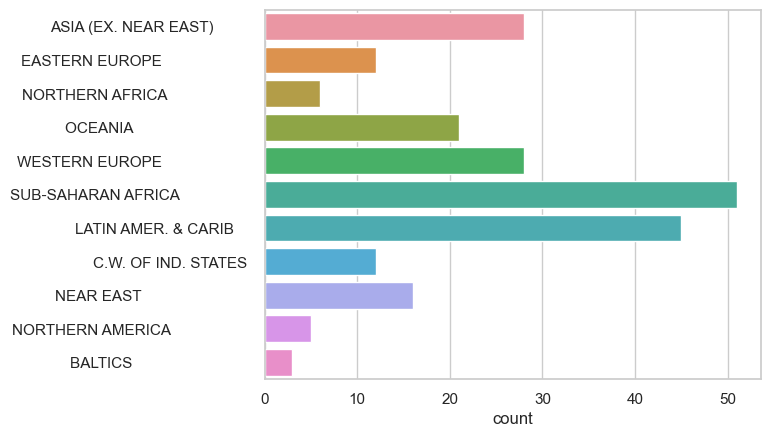

In [7]:
# Create count plot with region on the y-axis
sns.countplot(y=region)
plt.show()

### Making a count plot with a DataFrame
In this exercise, we'll look at the responses to a survey sent out to young people. Our primary question here is: how many young people surveyed report being scared of spiders? Survey participants were asked to agree or disagree with the statement "I am afraid of spiders". Responses vary from 1 to 5, where 1 is "Strongly disagree" and 5 is "Strongly agree".


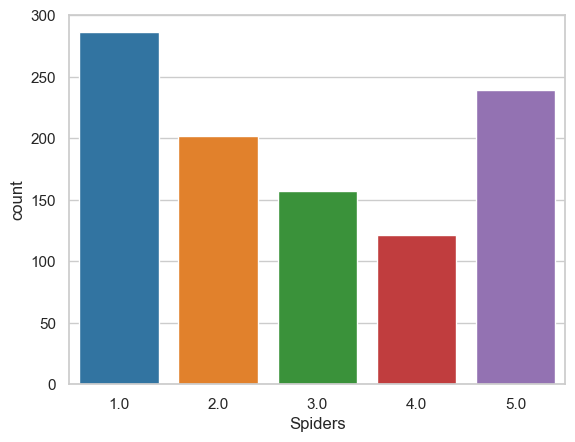

In [8]:
# Create a count plot with "Spiders" on the x-axis
sns.countplot(x="Spiders", data=survey_data)
plt.show()

> This plot shows us that most young people reported not being afraid of spiders.

### Hue and scatter plots
In the prior video, we learned how hue allows us to easily make subgroups within Seaborn plots. Let's try it out by exploring data from students in secondary school. We have a lot of information about each student like their age, where they live, their study habits and their extracurricular activities.

For now, we'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

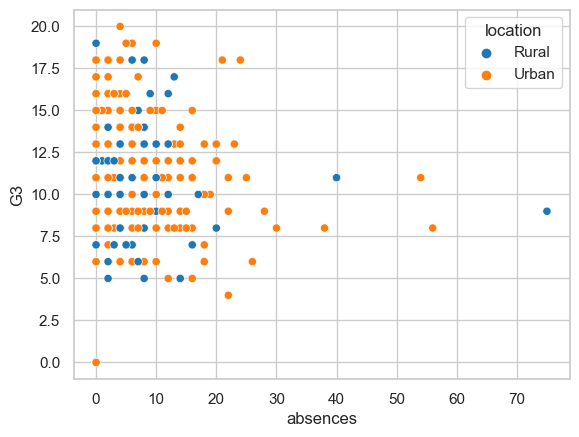

In [9]:
# Create a scatter plot with "absences" on the x-axis and final grade ("G3") on the y-axis using the DataFrame student_data. Color the plot points based on "location" (urban vs. rural).
sns.scatterplot(
    x="absences",
    y="G3",
    data=student_data,
    hue="location",
    hue_order=["Rural", "Urban"],
)
plt.show()

> It looks like students with higher absences tend to have lower grades in both rural and urban areas.

### Hue and count plots
Let's continue exploring our dataset from students in secondary school by looking at a new variable. The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

In the last exercise, we created a scatter plot where the plot points were colored based on whether the student lived in an urban or rural area. How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.



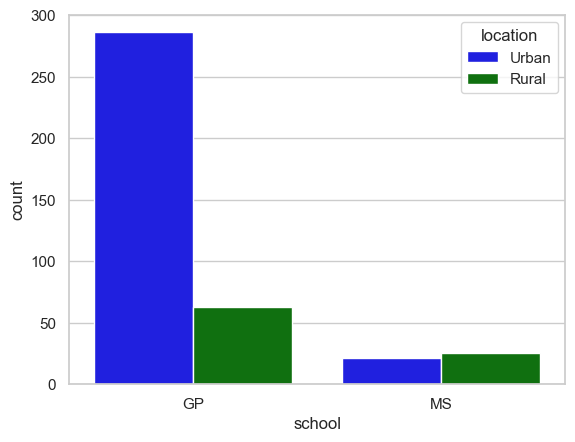

In [10]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", hue="location", palette=palette_colors, data=student_data)
plt.show()

> Students at GP tend to come from an urban location, but students at MS are more evenly split.

### Creating subplots with col and row
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

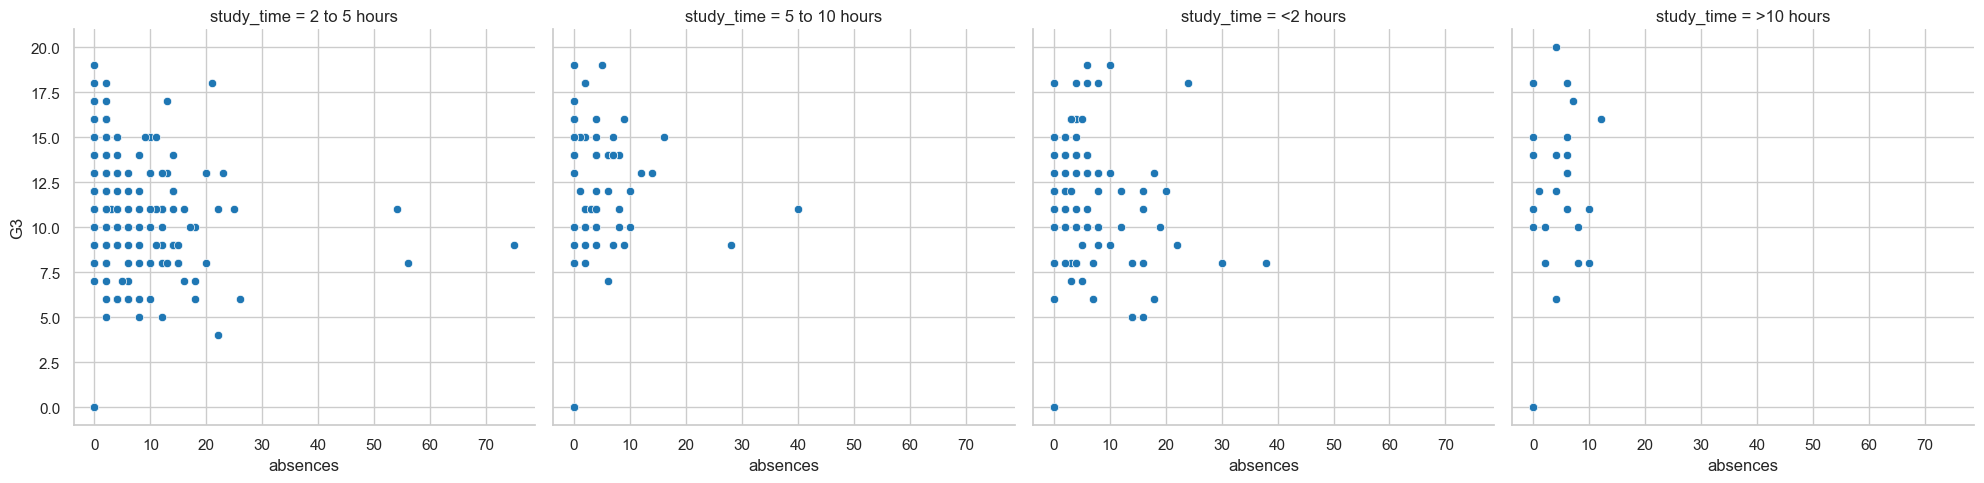

In [11]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", col="study_time")
plt.show()

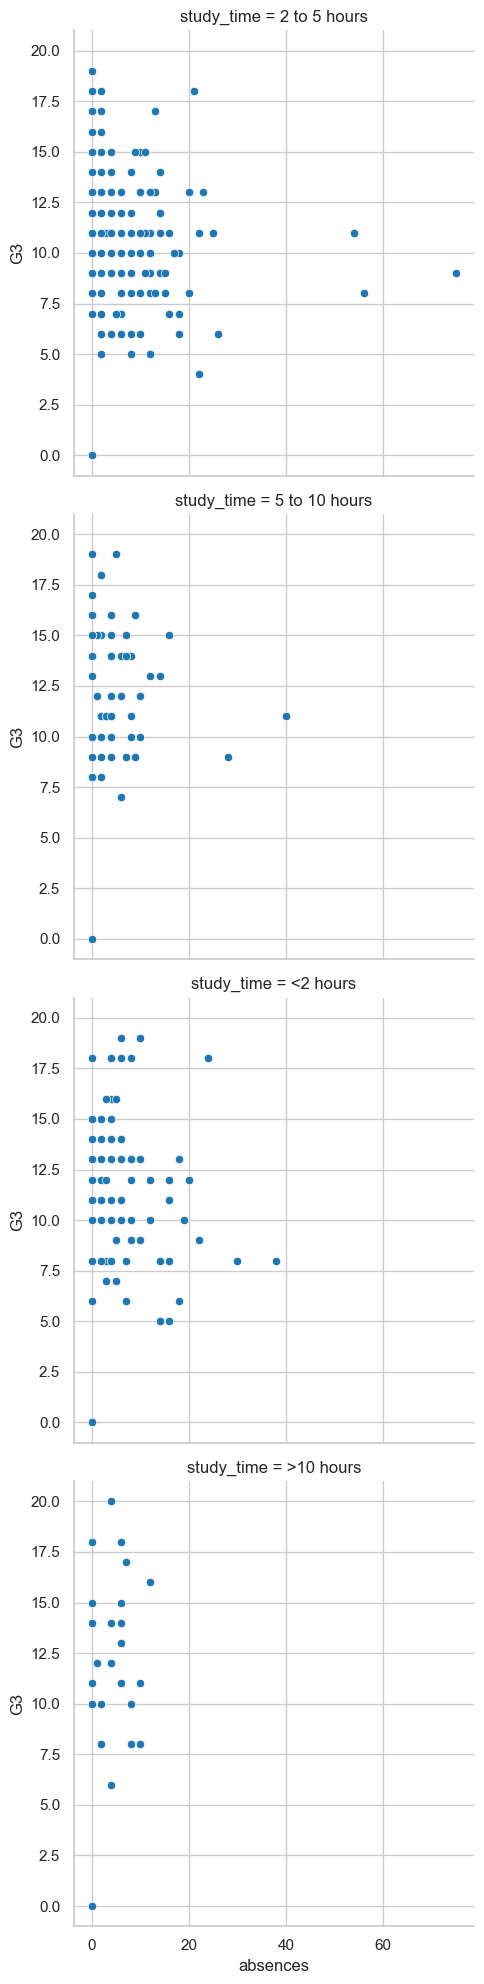

In [12]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", row="study_time")
plt.show()

> Because these subplots had a large range of x values, it's easier to read them arranged in rows instead of columns.

### Creating two-factor subplots
Let's continue looking at the student_data dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.


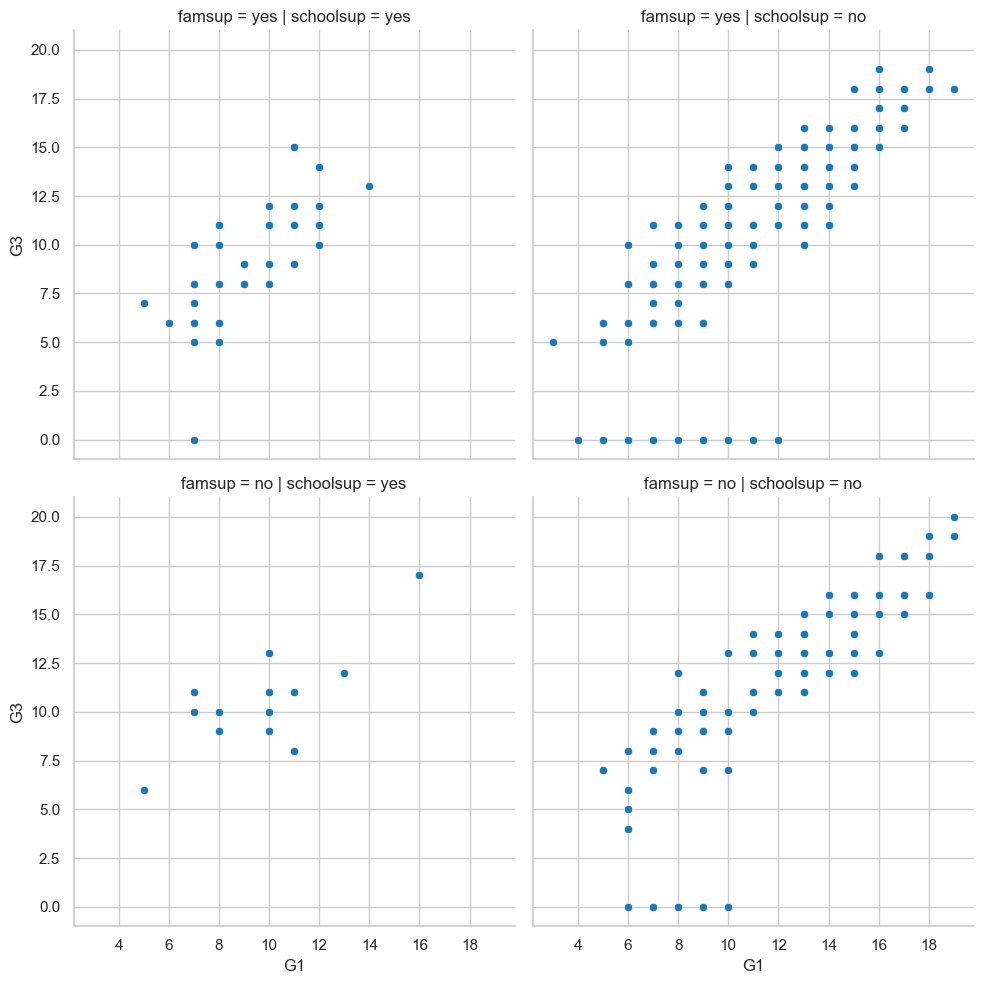

In [13]:
# Adjust further to add subplots based on family support
sns.relplot(
    x="G1",
    y="G3",
    data=student_data,
    kind="scatter",
    col="schoolsup",
    col_order=["yes", "no"],
    row="famsup",
    row_order=["yes", "no"],
)
plt.show()

> It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

### Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

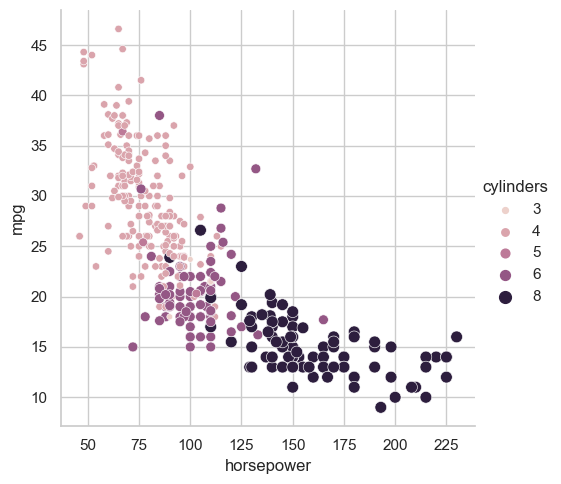

In [14]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(
    x="horsepower", y="mpg", data=mpg, kind="scatter", size="cylinders", hue="cylinders"
)
plt.show()

> Cars with higher horsepower tend to get a lower number of miles per gallon. They also tend to have a higher number of cylinders.

### Changing the style of scatter plot points
Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

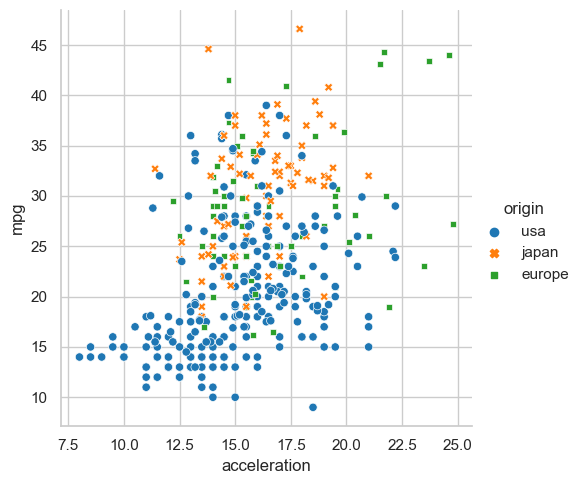

In [15]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration', y='mpg', data=mpg, kind='scatter', hue='origin', style='origin')
plt.show()

>  Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.

### Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

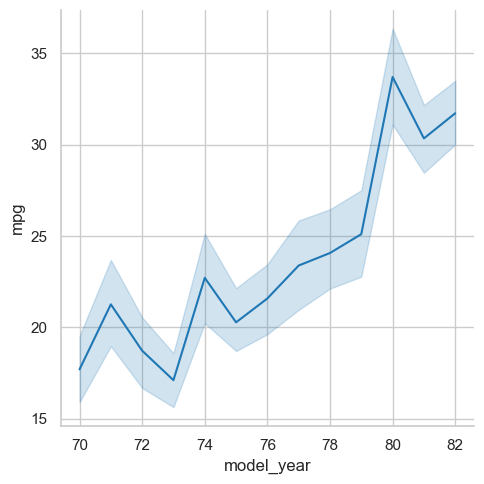

In [16]:
# Create line plot
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line')
plt.show()

### Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

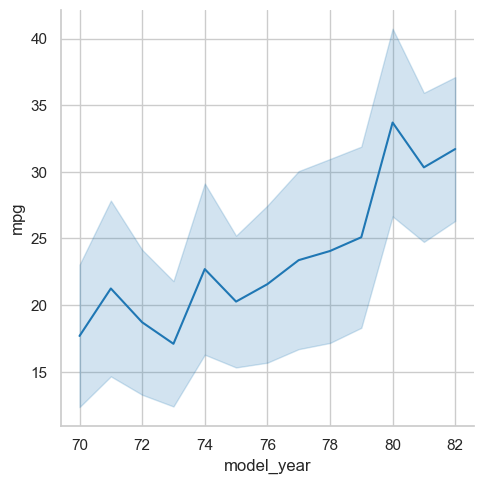

In [17]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", errorbar='sd')

# Show plot
plt.show()

> Unlike the plot in the last exercise, this plot shows us the distribution of miles per gallon for all the cars in each year.

### Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

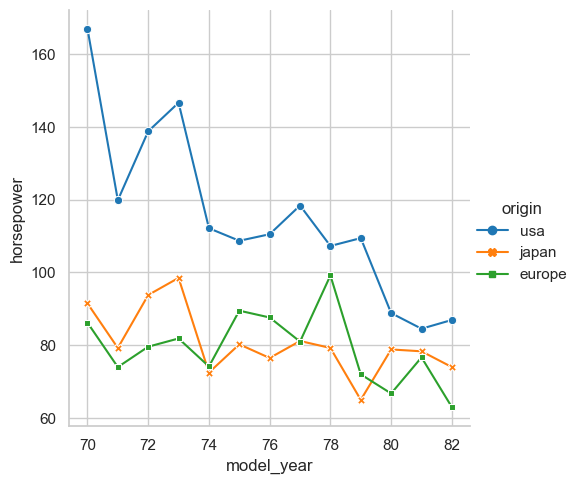

In [18]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            errorbar=None, style="origin", 
            hue="origin", dashes=False, markers=True)
plt.show()

> Now that we've added subgroups, we can see that this downward trend in horsepower was more pronounced among cars from the USA.

### Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

As a reminder, to create a count plot, we'll use the catplot() function and specify the name of the categorical variable to count (x=), the pandas DataFrame to use (data=), and the type of plot (kind="count").

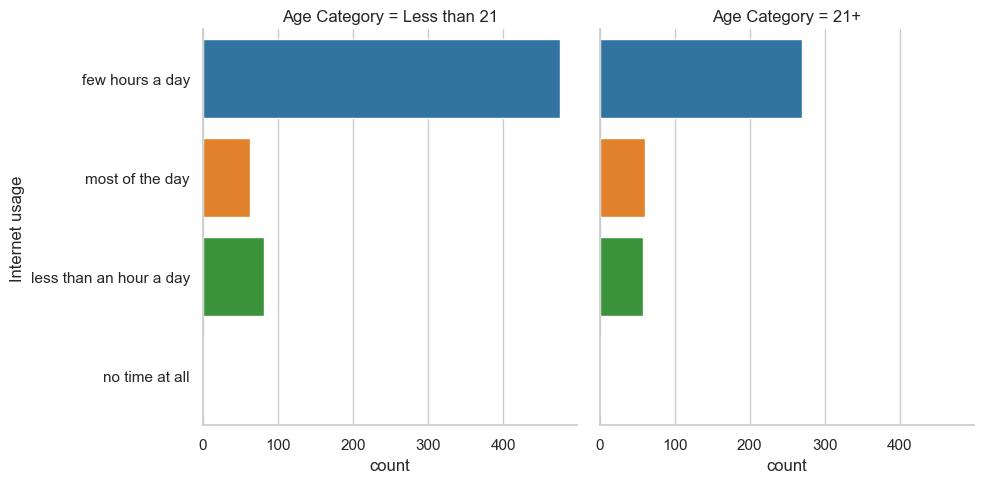

In [19]:
# Add age category
survey_data['Age Category'] = age_cat.values

# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", col='Age Category')
plt.show()

> It looks like most young people use the internet for a few hours every day, regardless of their age.

### Bar plots with percentages
Let's continue exploring the responses to a survey sent out to young people. The variable "Interested in Math" is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the catplot() function, providing the name of categorical variable to put on the x-axis (x=), the name of the quantitative variable to summarize on the y-axis (y=), the pandas DataFrame to use (data=), and the type of categorical plot (kind="bar").


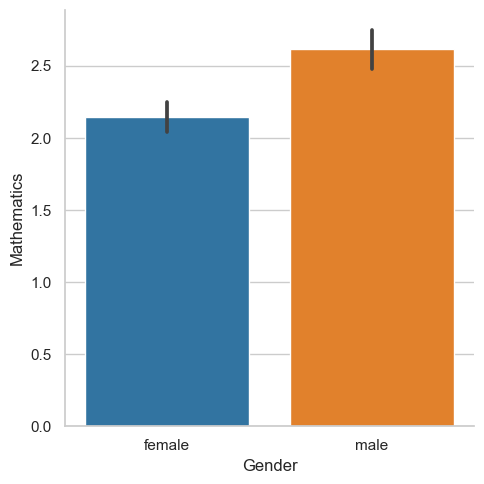

In [20]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x='Gender', y='Mathematics', data=survey_data, kind='bar')
plt.show()

> When the y-variable is True/False, bar plots will show the percentage of responses reporting True. This plot shows us that males report a much higher interest in math compared to females.

### Customizing bar plots
In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

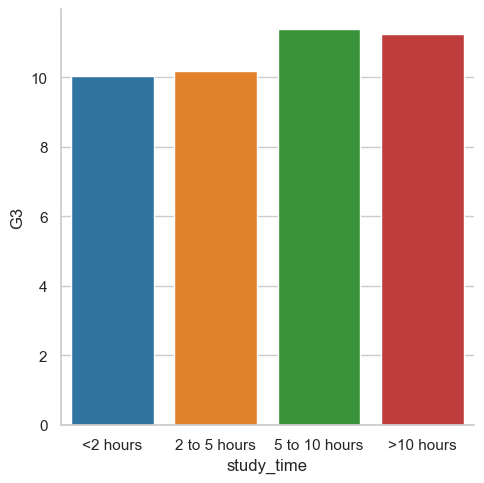

In [21]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar", order=category_order, errorbar=None)
plt.show()

> Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.

### Create and interpret a box plot
Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade ("G3") among students in different categories of "study_time".

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the catplot() function and specify the name of the categorical variable to put on the x-axis (x=), the name of the quantitative variable to summarize on the y-axis (y=), the pandas DataFrame to use (data=), and the type of plot (kind="box").

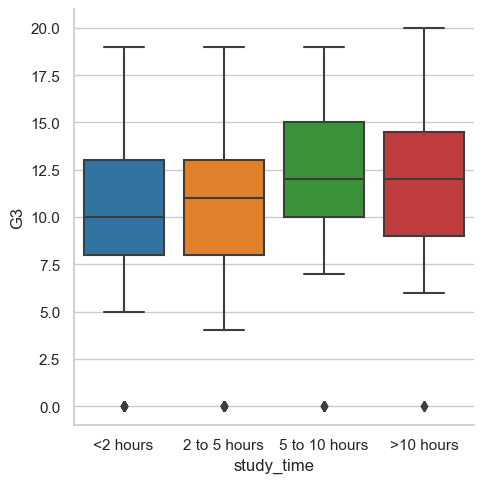

In [22]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x='study_time', y='G3', data=student_data, kind='box', order=study_time_order)
plt.show()

> The line in the middle of each box represents the median.

### Omitting outliers
Now let's use the student_data dataset to compare the distribution of final grades ("G3") between students who have internet access at home and those who don't. To do this, we'll use the "internet" variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the "location" variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

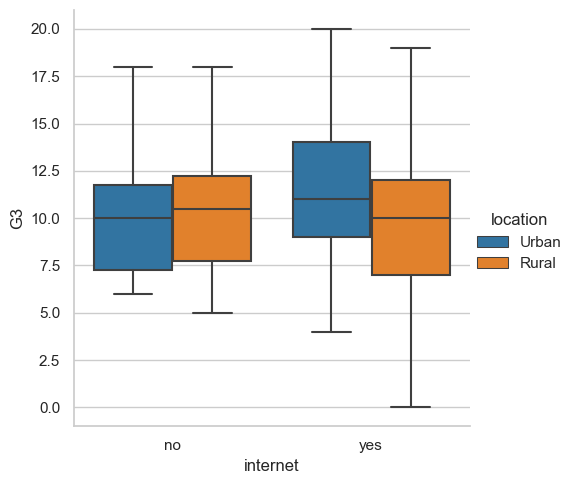

In [23]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x='internet', y='G3', data=student_data, kind='box', hue='location', sym='')
plt.show()

> The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

### Adjusting the whiskers
In the lesson we saw that there are multiple ways to define the whiskers in a box plot. In this set of exercises, we'll continue to use the student_data dataset to compare the distribution of final grades ("G3") between students who are in a romantic relationship and those that are not. We'll use the "romantic" variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

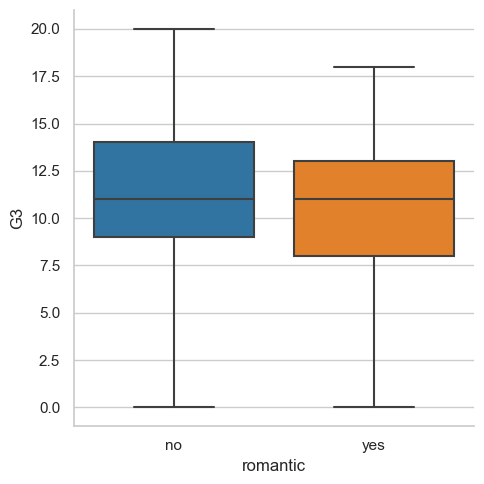

In [24]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])
plt.show()

### Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the "famrel" variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

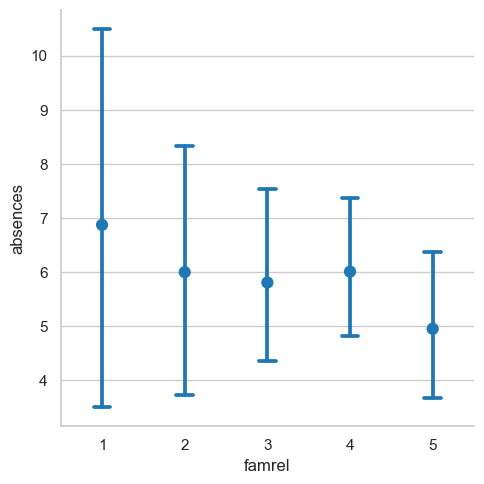

In [25]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2, join=False)
plt.show()

> While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.



### Point plots with subgroups
Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

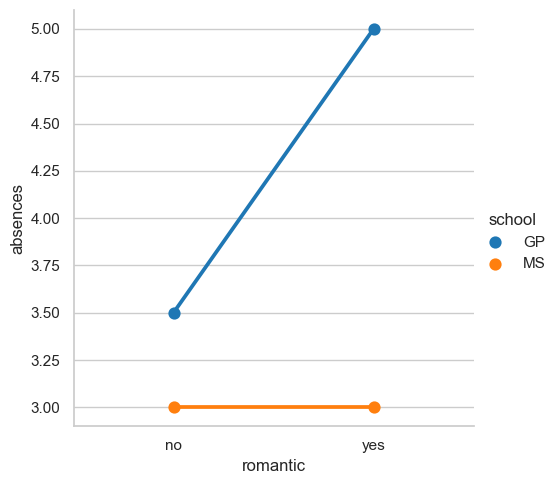

In [26]:
# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None, estimator=np.median)
plt.show()

> It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.



### FacetGrids vs. AxesSubplots
In the recent lesson, we learned that Seaborn plot functions create two different types of objects: FacetGrid objects and AxesSubplot objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name g. Let's identify which type of object it is.

<class 'seaborn.axisgrid.FacetGrid'>


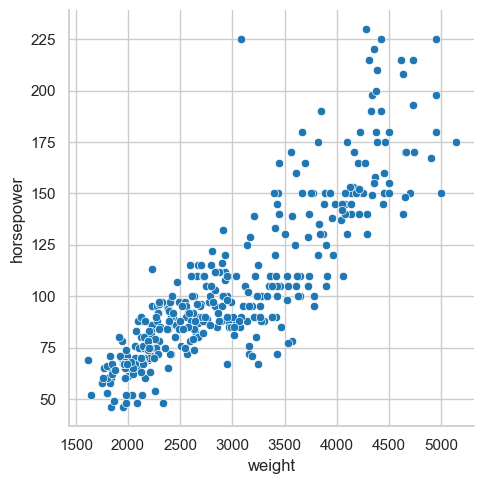

In [27]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

### Adding a title to a FacetGrid object
In the previous exercise, we used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a FacetGrid object. Now that we know what type of object it is, let's add a title to this plot.

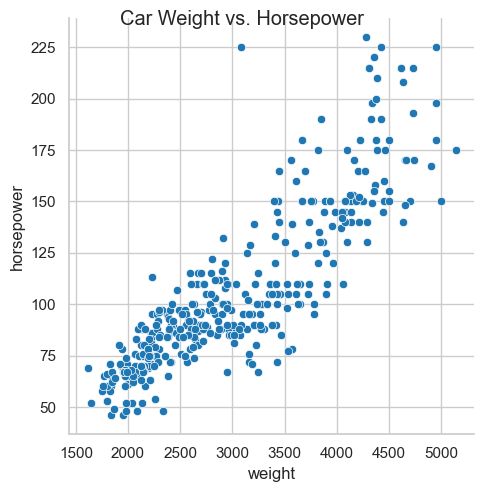

In [28]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle('Car Weight vs. Horsepower')
plt.show()

### Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the lineplot() function. Note that lineplot() does not support the creation of subplots, so it returns an AxesSubplot object instead of an FacetGrid object.

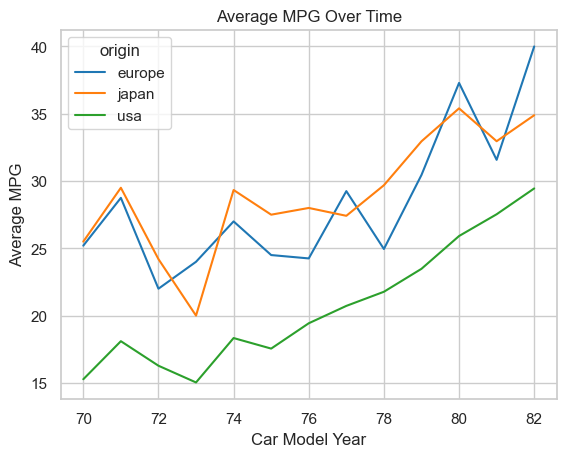

In [29]:
mpg_mean = mpg.groupby(['model_year', 'origin']).agg(mpg_mean=('mpg', np.mean))

# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean", 
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel='Car Model Year', ylabel='Average MPG')

plt.show()

>  The average miles per gallon achieved is increasing over time for all three places of origin, but the USA is always lower than Europe and Japan.

### Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

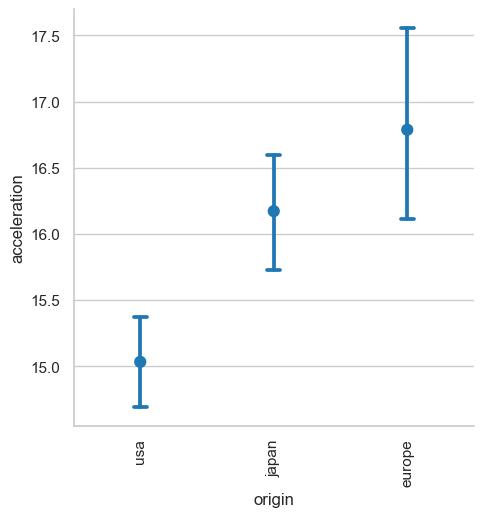

In [30]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

> Since higher values indicate slower acceleration, it looks like cars from Japan and Europe have significantly slower acceleration compares to the USA.

### Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

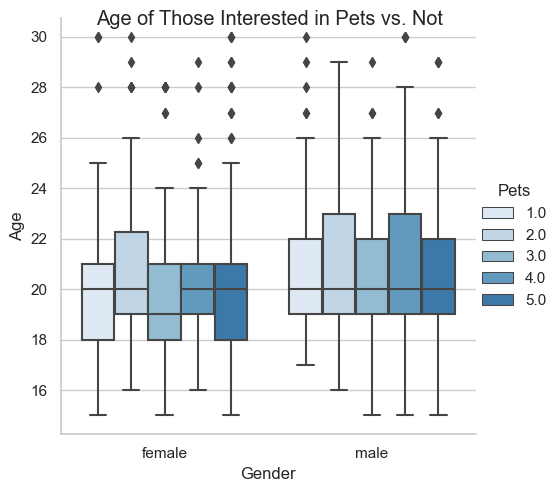

In [31]:
# Set palette to "Blues"
sns.set_palette('Blues')

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue='Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle('Age of Those Interested in Pets vs. Not')

# Show plot
plt.show()

> After controlling for gender, it looks like the age distributions of people who are interested in pets are similar than those who aren't

### Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music ("Likes Techno") varies by their gender ("Gender") or where they live ("Village - town"). This exercise will give us an opportunity to practice the many things we've learned throughout this course! 

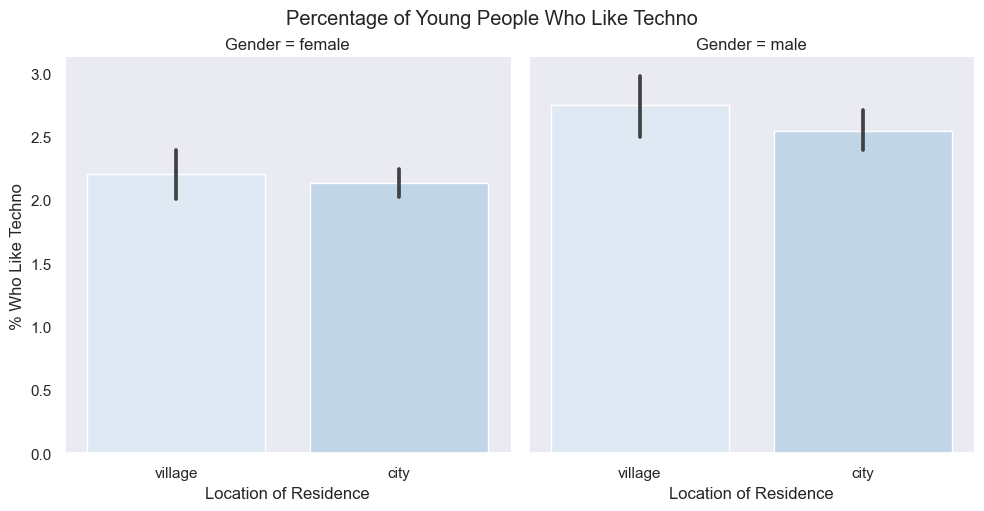

In [32]:
# Set the figure style to "dark"
sns.set_style('dark')

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=survey_data, kind="bar",
                col='Gender')

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

In [33]:
student_data

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20,LE3,A,2,2,1,2,...,4,4,5,4,11,9,9,9,Urban,2 to 5 hours
391,391,MS,M,17,LE3,T,3,1,2,0,...,5,3,4,2,3,14,16,16,Urban,<2 hours
392,392,MS,M,21,GT3,T,1,1,1,3,...,3,3,3,3,3,10,8,7,Rural,<2 hours
393,393,MS,M,18,LE3,T,3,2,3,0,...,1,3,4,5,0,11,12,10,Rural,<2 hours
